In [1]:
print('Olá Mundo!')

Olá Mundo!


In [62]:
# importar a biblioteca do Pandas para trabalhar com base de dados
import pandas as pd
import seaborn as sns
import numpy as np
import statistics  as sts

In [3]:
# criar uma variável para salvar o caminho do arquivo
arquivo = '/content/drive/MyDrive/Colab Notebooks/IADS/02_BD_PARTOS.xlsx'

In [51]:
dados = pd.read_excel(arquivo)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DT_INTERNACAO                  1709 non-null   datetime64[ns]
 1   HR_INTERNACAO                  1709 non-null   object        
 2   DT_ALTA                        1709 non-null   datetime64[ns]
 3   HR_ALTA                        1709 non-null   object        
 4   DURACAO_INT                    1709 non-null   float64       
 5   GESTACOES                      1709 non-null   int64         
 6   PARTOS                         1708 non-null   float64       
 7   IG_OBSTETRA                    1689 non-null   float64       
 8   IG_PEDIATRA                    1706 non-null   float64       
 9   HIPERTENSAO                    1709 non-null   int64         
 10  GEMELAR                        1709 non-null   int64         
 11  DSP_MATERNO      

In [56]:
dados = pd.read_excel(arquivo, usecols=[4,5,6,7,8,9,10,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,30,40])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DURACAO_INT       1709 non-null   float64
 1   GESTACOES         1709 non-null   int64  
 2   PARTOS            1708 non-null   float64
 3   IG_OBSTETRA       1689 non-null   float64
 4   IG_PEDIATRA       1706 non-null   float64
 5   HIPERTENSAO       1709 non-null   int64  
 6   GEMELAR           1709 non-null   int64  
 7   CESAREAS_PREVIAS  1702 non-null   float64
 8   EPISIOTOMIA       1709 non-null   int64  
 9   ANALGESIA         1709 non-null   int64  
 10  FORCEPS           1709 non-null   int64  
 11  CM_UTI_MAE        1709 non-null   int64  
 12  ALTO_RISCO        1709 non-null   int64  
 13  INFECCAO_MAE      1709 non-null   int64  
 14  NEARMISS          1709 non-null   int64  
 15  CM_TRANSFUSAO     1706 non-null   float64
 16  TIPO_PARTO        1709 non-null   int64  


In [57]:
dados

,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,HIPERTENSAO,GEMELAR,CESAREAS_PREVIAS,EPISIOTOMIA,ANALGESIA,...,CM_TRANSFUSAO,TIPO_PARTO,NEONATOS,APGAR_1,APGAR_5,PESO_NASCER,VIVO,RN_UTI,SEXO_RN,IG_TERMO
0,8.906250,6,5.0,33.0,33.0,0,0,0.0,0,0,...,1.0,2,1,0.0,0.0,1190.0,0.0,0,1,1.0
1,3.401389,1,0.0,27.0,27.0,1,0,0.0,0,0,...,0.0,1,1,0.0,0.0,617.0,0.0,0,1,1.0
2,3.179167,1,0.0,38.0,38.0,1,0,0.0,0,1,...,0.0,2,1,0.0,0.0,3370.0,0.0,0,2,2.0
3,2.534722,2,1.0,24.0,24.0,1,0,1.0,0,0,...,0.0,1,1,0.0,0.0,410.0,0.0,0,1,1.0
4,2.202778,2,1.0,37.0,37.0,0,0,0.0,0,0,...,0.0,2,1,1.0,0.0,1870.0,1.0,0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,1.345833,2,1.0,39.0,39.0,0,0,0.0,0,1,...,0.0,1,1,NaN,0.0,NaN,NaN,0,0,3.0
1705,1.016667,1,0.0,22.0,22.0,0,0,0.0,0,0,...,0.0,1,1,NaN,0.0,750.0,0.0,0,1,1.0
1706,1.000000,1,0.0,38.0,38.0,0,0,0.0,0,1,...,0.0,1,1,9.0,0.0,2530.0,1.0,0,2,2.0
1707,0.931944,2,0.0,19.0,20.0,0,0,1.0,0,0,...,0.0,1,1,NaN,0.0,300.0,0.0,0,1,1.0


In [58]:
# Resumo descritivo das colunas numéricas 
# Observação: que o Python entendeu como númerica na importação
dados.describe()

,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,HIPERTENSAO,GEMELAR,CESAREAS_PREVIAS,EPISIOTOMIA,ANALGESIA,...,CM_TRANSFUSAO,TIPO_PARTO,NEONATOS,APGAR_1,APGAR_5,PESO_NASCER,VIVO,RN_UTI,SEXO_RN,IG_TERMO
count,1709.000000,1709.000000,1708.000000,1689.000000,1706.000000,1709.000000,1709.000000,1702.000000,1709.000000,1709.000000,...,1706.000000,1709.000000,1709.000000,1651.000000,1703.000000,1681.000000,1673.000000,1709.000000,1709.00000,1689.000000
mean,3.019051,2.174371,0.953162,37.857904,37.941970,0.130486,0.039789,0.262045,0.277940,0.214745,...,0.018757,1.382095,1.038034,8.011508,8.850851,2977.876859,0.981470,0.143944,1.44880,2.374778
std,4.320177,1.448984,1.226598,3.436104,3.189908,0.336936,0.195521,0.600376,0.448115,0.410766,...,0.135707,0.486042,0.191334,1.863653,2.070173,690.987646,0.134897,0.351136,0.56164,0.762637
min,0.768750,1.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,270.000000,0.000000,0.000000,0.00000,1.000000
25%,1.606250,1.000000,0.000000,37.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,8.000000,9.000000,2710.000000,1.000000,0.000000,1.00000,2.000000
50%,2.070833,2.000000,1.000000,39.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,9.000000,9.000000,3065.000000,1.000000,0.000000,1.00000,3.000000
75%,2.852778,3.000000,1.000000,40.000000,40.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,1.000000,9.000000,10.000000,3390.000000,1.000000,0.000000,2.00000,3.000000
max,62.537500,17.000000,10.000000,42.000000,42.000000,1.000000,1.000000,5.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,10.000000,10.000000,5625.000000,1.000000,1.000000,3.00000,3.000000


In [59]:
# Contando a quantidade de casos por categoria de uma variável
# Já se sabe pela documentação da Base de dados que:
# 1 = partos vaginais
# 2 = partos cesáreos
dados.TIPO_PARTO.value_counts()

1    1056
2     653
Name: TIPO_PARTO, dtype: int64

In [60]:
# Contando a quantidade de casos por categoria de uma variável
# Já se sabe pela documentação da Base de dados que:
# 0 = missing (não preenchido), 1 = masculino, 2 = feminino, 3 = indeterminado
dados.SEXO_RN.value_counts()

1    853
2    798
0     49
3      9
Name: SEXO_RN, dtype: int64

In [67]:
#  Limpeza de dados
#  Preencher com null (na) os valores 0 e 3
dados.SEXO_RN.replace(0, np.nan, inplace=True)
dados.SEXO_RN.replace(3, np.nan, inplace=True)

# Tratamento de dados
# Trocar os números pelo conteúdo das categorias, o python não precisa que as categorias sejam códigos
dados.SEXO_RN.replace(1, 'Masculino', inplace=True)
dados.SEXO_RN.replace(2, 'Feminino', inplace=True)

dados.SEXO_RN.value_counts()

Masculino    853
Feminino     798
Name: SEXO_RN, dtype: int64

In [64]:
# Contando a quantidade de casos por categoria de uma variável
# Já se sabe pela documentação da Base de dados que: 1 = sim, 0 = não
dados.ALTO_RISCO.value_counts()

0    908
1    801
Name: ALTO_RISCO, dtype: int64

In [68]:
# Tratamento de dados
# Trocar os números pelo conteúdo das categorias, o python não precisa que as categorias sejam códigos
dados.ALTO_RISCO.replace(0, 'Não', inplace=True)
dados.ALTO_RISCO.replace(1, 'Sim', inplace=True)
dados.ALTO_RISCO.value_counts()

Não    908
Sim    801
Name: ALTO_RISCO, dtype: int64

In [66]:
# VIVO deveria ser: 0 = nascido morto, 1 = nascido vivo
dados.VIVO.value_counts()

1.0    1642
0.0      31
Name: VIVO, dtype: int64

In [69]:
# Tratamento de dados
# Trocar os números pelo conteúdo das categorias, o python não precisa que as categorias sejam códigos
dados.VIVO.replace(0, 'Nascido morto', inplace=True)
dados.VIVO.replace(1, 'Nascido vivo', inplace=True)
dados.VIVO.value_counts()

Nascido vivo     1642
Nascido morto      31
Name: VIVO, dtype: int64

In [75]:
# Tratamento de dados
# Trocar os números pelo conteúdo das categorias, o python não precisa que as categorias sejam códigos
dados.TIPO_PARTO.replace(1, 'Parto Normal', inplace=True)
dados.TIPO_PARTO.replace(2, 'Parto Cesáreo', inplace=True)
dados.TIPO_PARTO.value_counts()

Parto Normal     1056
Parto Cesáreo     653
Name: TIPO_PARTO, dtype: int64

In [78]:
pd.crosstab(dados.SEXO_RN, dados.TIPO_PARTO)

TIPO_PARTO,Parto Cesáreo,Parto Normal
SEXO_RN,,
Feminino,275,523
Masculino,356,497


In [77]:
pd.crosstab(dados.SEXO_RN, dados.TIPO_PARTO, normalize=True)

TIPO_PARTO,Parto Cesáreo,Parto Normal
SEXO_RN,,
Feminino,0.166566,0.316778
Masculino,0.215627,0.301030


In [65]:
# APGAR deveria ser de 0 a 10
dados.APGAR_1.value_counts()

9.0     791
8.0     482
10.0     95
7.0      77
5.0      43
6.0      41
4.0      37
1.0      28
3.0      28
2.0      21
0.0       8
Name: APGAR_1, dtype: int64

In [13]:
# Contando a quantidade de casos
dados.GESTACOES.value_counts()

1     687
2     520
3     251
4     130
5      62
6      38
7      12
8       3
9       2
11      2
13      1
17      1
Name: GESTACOES, dtype: int64

In [87]:
#explorar colunas numéricas
dados.GESTACOES.describe()

count    1709.000000
mean        2.174371
std         1.448984
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        17.000000
Name: GESTACOES, dtype: float64

Text(0.5, 1.0, 'Nº de Gestações')

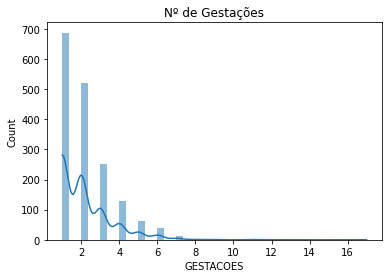

In [88]:
# Histograma com gráfico de densidade
sns.histplot(dados.GESTACOES, kde=True, linewidth=0).set_title('Nº de Gestações')

In [80]:
#explorar colunas numéricas
dados.PESO_NASCER.describe()

count    1681.000000
mean     2977.876859
std       690.987646
min       270.000000
25%      2710.000000
50%      3065.000000
75%      3390.000000
max      5625.000000
Name: PESO_NASCER, dtype: float64

Text(0.5, 1.0, 'Peso ao Nascer')

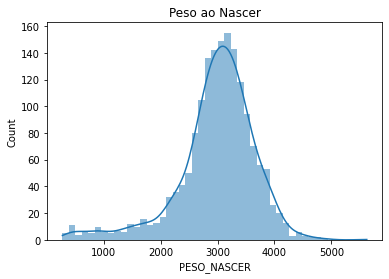

In [90]:
# Histograma com gráfico de densidade
sns.histplot(dados.PESO_NASCER, kde=True, linewidth=0).set_title('Peso ao Nascer')

Text(0.5, 1.0, 'Peso ao Nascer')

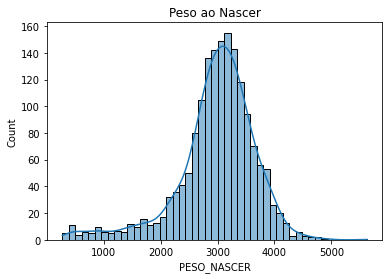

In [91]:
# Histograma com gráfico de densidade
sns.histplot(dados.PESO_NASCER, kde=True, linewidth=1).set_title('Peso ao Nascer')

In [81]:
#explorar colunas numéricas
dados.IG_OBSTETRA.describe()

count    1689.000000
mean       37.857904
std         3.436104
min         0.000000
25%        37.000000
50%        39.000000
75%        40.000000
max        42.000000
Name: IG_OBSTETRA, dtype: float64

Text(0.5, 1.0, 'IG - Obstetra')

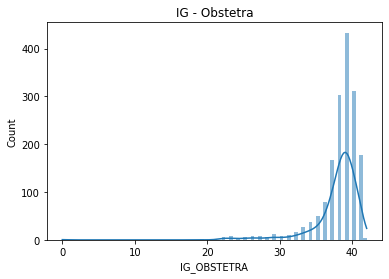

In [92]:
# Histograma com gráfico de densidade
sns.histplot(dados.IG_OBSTETRA, kde=True, linewidth=0).set_title('IG - Obstetra')

In [93]:
#  Limpeza de dados
dados.IG_OBSTETRA.value_counts()

39.0    433
40.0    311
38.0    302
41.0    177
37.0    168
36.0     80
35.0     49
34.0     37
33.0     26
32.0     16
29.0     13
31.0     11
30.0      9
26.0      9
27.0      8
23.0      8
22.0      7
25.0      6
28.0      6
42.0      5
24.0      5
0.0       2
19.0      1
Name: IG_OBSTETRA, dtype: int64

In [94]:
#  Limpeza de dados
#  Preencher com null (na) os valores 0 e 19
dados.IG_OBSTETRA.replace(0, np.nan, inplace=True)
dados.IG_OBSTETRA.replace(19, np.nan, inplace=True)

dados.IG_OBSTETRA.value_counts()

39.0    433
40.0    311
38.0    302
41.0    177
37.0    168
36.0     80
35.0     49
34.0     37
33.0     26
32.0     16
29.0     13
31.0     11
30.0      9
26.0      9
27.0      8
23.0      8
22.0      7
25.0      6
28.0      6
24.0      5
42.0      5
Name: IG_OBSTETRA, dtype: int64

In [95]:
#explorar colunas numéricas
dados.IG_OBSTETRA.describe()

count    1686.000000
mean       37.913998
std         3.148409
min        22.000000
25%        37.000000
50%        39.000000
75%        40.000000
max        42.000000
Name: IG_OBSTETRA, dtype: float64

Text(0.5, 1.0, 'IG - Obstetra')

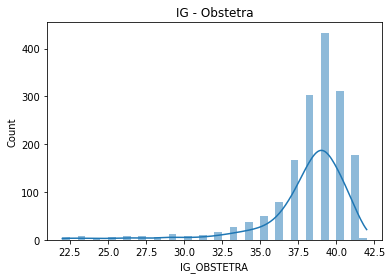

In [96]:
# Histograma com gráfico de densidade
sns.histplot(dados.IG_OBSTETRA, kde=True, linewidth=0).set_title('IG - Obstetra')

Text(0.5, 1.0, 'IG - Obstetra')

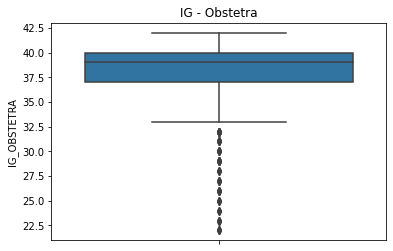

In [102]:
# Visualização de um boxplot
sns.boxplot(y=dados.IG_OBSTETRA).set_title('IG - Obstetra')

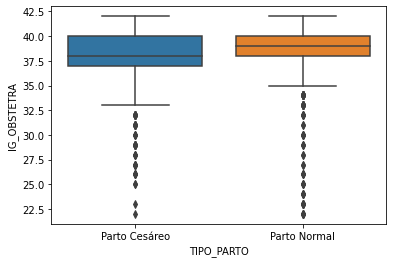

In [104]:
sns.boxplot(data=dados, x='TIPO_PARTO', y='IG_OBSTETRA')

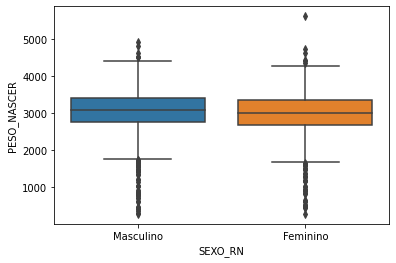

In [105]:
sns.boxplot(data=dados, x='SEXO_RN', y='PESO_NASCER')

In [97]:
#explorar colunas numéricas
dados.DURACAO_INT.describe()

count    1709.000000
mean        3.019051
std         4.320177
min         0.768750
25%         1.606250
50%         2.070833
75%         2.852778
max        62.537500
Name: DURACAO_INT, dtype: float64

Text(0.5, 1.0, 'Duração da internação (dias)')

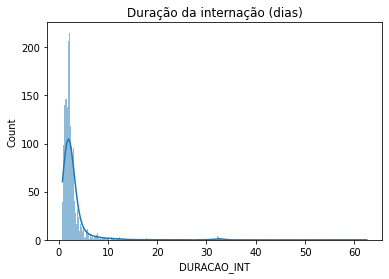

In [99]:
# Histograma com gráfico de densidade
sns.histplot(dados.DURACAO_INT, kde=True, linewidth=0).set_title('Duração da internação (dias)')

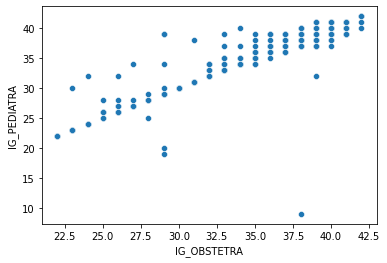

In [128]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="IG_PEDIATRA")

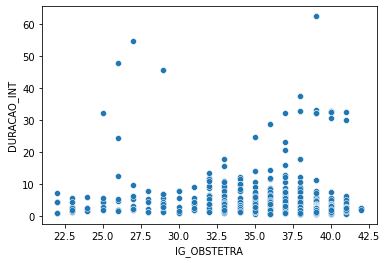

In [129]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="DURACAO_INT")

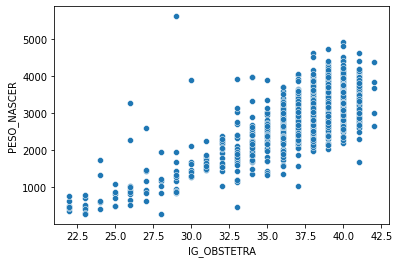

In [130]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER")

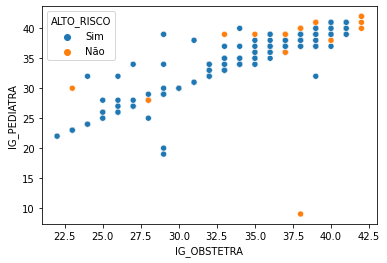

In [131]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="IG_PEDIATRA", hue="ALTO_RISCO")

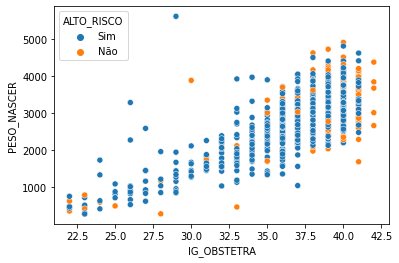

In [132]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER", hue="ALTO_RISCO")

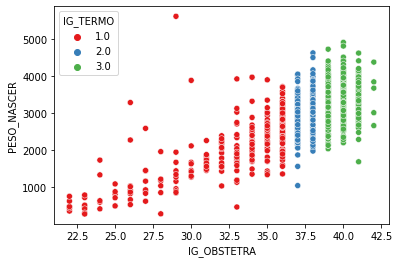

In [137]:
# Gráfico de dispersão
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER", hue="IG_TERMO", palette='Set1')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


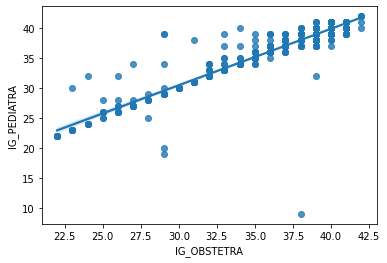

In [127]:
# Gráfico de dispersão, 
# fit_reg = linha de tendência
sns.regplot(dados.IG_OBSTETRA, dados.IG_PEDIATRA, data=dados, fit_reg = True)

<Figure size 432x288 with 0 Axes>

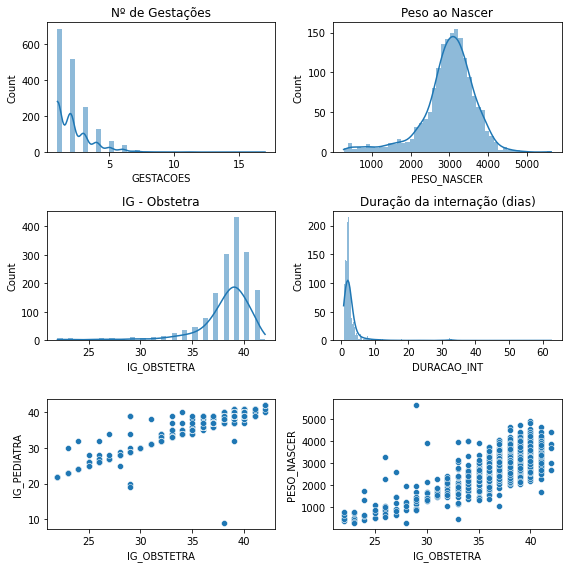

In [138]:
#impresssão em gráfico 2 x 3
plt.figure()
fig, ax = plt.subplots(figsize=(8, 8))

plt.subplot(3,2,1)
sns.histplot(dados.GESTACOES, kde=True, linewidth=0).set_title('Nº de Gestações')

plt.subplot(3,2,2)
sns.histplot(dados.PESO_NASCER, kde=True, linewidth=0).set_title('Peso ao Nascer')

plt.subplot(3,2,3)
sns.histplot(dados.IG_OBSTETRA, kde=True, linewidth=0).set_title('IG - Obstetra')

plt.subplot(3,2,4)
sns.histplot(dados.DURACAO_INT, kde=True, linewidth=0).set_title('Duração da internação (dias)')

plt.subplot(3,2,5)
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="IG_PEDIATRA")

plt.subplot(3,2,6)
sns.scatterplot(data=dados, x="IG_OBSTETRA", y="PESO_NASCER")

#ajusta o layout para não haver sobreposição
plt.tight_layout()

In [110]:
dados.ALTO_RISCO.value_counts()

Não    908
Sim    801
Name: ALTO_RISCO, dtype: int64

Text(0.5, 1.0, 'Frequência de alto risco')

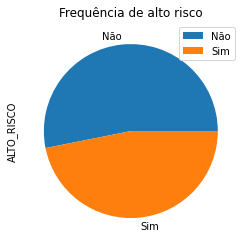

In [112]:
# Gráfico de Pizza

# Quantidade por alto risco
pizza_altorisco = dados.ALTO_RISCO.value_counts()

pizza_altorisco.plot.pie(legend = True).set_title('Frequência de alto risco')

Text(0.5, 1.0, 'Frequência de alto risco')

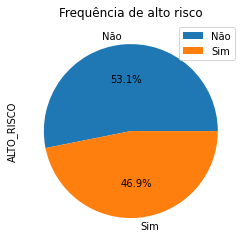

In [113]:
pizza_altorisco.plot.pie(legend = True, autopct='%1.1f%%').set_title('Frequência de alto risco')

In [17]:
# Filtrar casos por algum valor ou categoria
# criar outra variavel com os registros de prematuros
dadosPrematuros = dados[ dados.IG_PEDIATRA <= 36 ]
dadosPrematuros

,DURACAO_INT,GESTACOES,PARTOS,IG_OBSTETRA,IG_PEDIATRA,HIPERTENSAO,GEMELAR,CESAREAS_PREVIAS,EPISIOTOMIA,ANALGESIA,...,TIPO_PARTO,NEONATOS,APGAR_1,APGAR_5,PESO_NASCER,VIVO,RN_UTI,SEXO_RN,APGAR_1MIN_REC,IG_TERMO
0,8.906250,6,5.0,33.0,33.0,0,0,0.0,0,0,...,2,1,0.0,0.0,1190.0,0.0,0,1,1.0,1.0
1,3.401389,1,0.0,27.0,27.0,1,0,0.0,0,0,...,1,1,0.0,0.0,617.0,0.0,0,1,1.0,1.0
3,2.534722,2,1.0,24.0,24.0,1,0,1.0,0,0,...,1,1,0.0,0.0,410.0,0.0,0,1,1.0,1.0
5,1.869444,2,1.0,26.0,26.0,1,0,1.0,0,0,...,2,1,2.0,0.0,3290.0,1.0,0,3,1.0,1.0
6,1.763889,3,2.0,24.0,24.0,0,0,0.0,0,0,...,1,1,0.0,0.0,1330.0,0.0,0,3,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1.992361,2,1.0,33.0,33.0,0,0,1.0,0,1,...,1,1,NaN,0.0,1585.0,0.0,0,1,NaN,1.0
1702,1.943750,2,1.0,23.0,23.0,0,0,1.0,0,0,...,1,1,NaN,0.0,270.0,0.0,0,2,NaN,1.0
1703,1.563889,2,1.0,26.0,26.0,0,0,0.0,0,0,...,1,1,NaN,0.0,525.0,0.0,0,2,NaN,1.0
1705,1.016667,1,0.0,22.0,22.0,0,0,0.0,0,0,...,1,1,NaN,0.0,750.0,0.0,0,1,NaN,1.0


In [34]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from scipy.stats import chi2_contingency

In [36]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[207, 282, 241], [234, 242, 232]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p-value: " + str(p))
if p <= alpha:
    print('Rejeita H0 = existe associação entre as variáveis!')
else:
    print('Aceita H0 = não existe evidência de associação entre as variáveis!')

p-value: 0.1031971404730939
Aceita H0 = não existe evidência de associação entre as variáveis!


In [114]:
# Qui-Quadrado de Pearson

# Definir as variáveis
coluna_A = dados.SEXO_RN
coluna_B = dados.TIPO_PARTO
significancia = 0.05
 
# criando a tabela contigência
tabela_contigencia = pd.crosstab(coluna_A, coluna_B)
print(tabela_contigencia)
print('')

# Calculando o qui-quadrado
stat, p, dof, expected = chi2_contingency(tabela_contigencia)
  
# Código para interpretar o resultado
alpha = significancia
print("p-value: " + str(p))
if p <= alpha:
    print('Rejeita H0 = Variáveis dependentes! Existe associação entre as variáveis!')
else:
    print('Aceita H0 = Variáveis independentes! Não existe evidência de associação entre as variáveis!')

TIPO_PARTO  Parto Cesáreo  Parto Normal
SEXO_RN                                
Feminino              275           523
Masculino             356           497

p-value: 0.0028005375904741276
Rejeita H0 = Variáveis dependentes! Existe associação entre as variáveis!


In [115]:
# Qui-Quadrado de Pearson

# Definir as variáveis
coluna_A = dados.SEXO_RN
coluna_B = dados.RN_UTI
significancia = 0.05
  
# criando a tabela contigência
tabela_contigencia = pd.crosstab(coluna_A, coluna_B)
print(tabela_contigencia)
print('')

# Calculando o qui-quadrado
stat, p, dof, expected = chi2_contingency(tabela_contigencia)
  
# Código para interpretar o resultado
alpha = significancia
print("p-value: " + str(p))
if p <= alpha:
    print('Rejeita H0 = Variáveis dependentes! Existe associação entre as variáveis!')
else:
    print('Aceita H0 = Variáveis independentes! Não existe evidência de associação entre as variáveis!')

RN_UTI       0    1
SEXO_RN            
Feminino   695  103
Masculino  711  142

p-value: 0.03874659754769827
Rejeita H0 = Variáveis dependentes! Existe associação entre as variáveis!


In [116]:
# Teste exato de Fisher
from scipy.stats import fisher_exact

# Definir as variáveis
coluna_A = dados.FORCEPS
coluna_B = dados.NEARMISS
significancia = 0.05

  
# criando a tabela contigência
tabela_contigencia = pd.crosstab(coluna_A, coluna_B)
print(tabela_contigencia)
print('')

# Calculando o Fisher
oddsr, p = fisher_exact(tabela_contigencia, alternative='two-sided')
  
# Código para interpretar o resultado
alpha = significancia
print("p-value: " + str(p))
print("oddsr: " + str(oddsr))
if p <= alpha:
    print('Rejeita H0 = Variáveis dependentes! Existe associação entre as variáveis!')
else:
    print('Aceita H0 = Variáveis independentes! Não existe evidência de associação entre as variáveis!')

NEARMISS     0   1
FORCEPS           
0         1605  17
1           87   0

p-value: 1.0
oddsr: 0.0
Aceita H0 = Variáveis independentes! Não existe evidência de associação entre as variáveis!


In [117]:
# Teste exato de Fisher
from scipy.stats import fisher_exact

# Definir as variáveis
coluna_A = dados.VIVO
coluna_B = dados.NEARMISS
significancia = 0.05

  
# criando a tabela contigência
tabela_contigencia = pd.crosstab(coluna_A, coluna_B)
print(tabela_contigencia)
print('')

# Calculando o Fisher
oddsr, p = fisher_exact(tabela_contigencia, alternative='two-sided')
  
# Código para interpretar o resultado
alpha = significancia
print("p-value: " + str(p))
print("oddsr: " + str(oddsr))
if p <= alpha:
    print('Rejeita H0 = Variáveis dependentes! Existe associação entre as variáveis!')
else:
    print('Aceita H0 = Variáveis independentes! Não existe evidência de associação entre as variáveis!')

NEARMISS          0   1
VIVO                   
Nascido morto    30   1
Nascido vivo   1626  16

p-value: 0.2734899608871841
oddsr: 0.2952029520295203
Aceita H0 = Variáveis independentes! Não existe evidência de associação entre as variáveis!


# Criar qrCode

In [ ]:
!pip install qrcode

In [ ]:
import qrcode

imagem = qrcode.make("https://github.com/JulianoGaspar")

imagem.save("qrCode_GitJulianoGaspar.png")

# Mapas

In [151]:
# Importando as bibliotecas

# folium para trabalhar com mapas
import folium
from branca.element import Figure

In [154]:
# Configurar uma área de imagem de 600 x 800 pixels
figMapa = Figure(height=800, width=800)

# Precisamos informar uma localização (latitude, longitude) e o zoom (altura do mapa),
# para o mapa aparecer corretamente na tela

# Coordenadas retiradas do Google Maps / Centralizado no bairro da lagoinha
latitude = -19.90692178459391
logitude = -43.9430414030567

mapa = folium.Map(location=[latitude, logitude], zoom_start=13, tiles='cartodbpositron')

figMapa.add_child(mapa)

In [155]:
# Vamos incluir um marcador no mapa (pin)

# Coordenadas retiradas do Google Maps / UFMG
latitude = -19.868833539658212
logitude = -43.967379583007826

# Criando um marcador (pin)
pin = folium.Marker(location=[latitude, logitude])

# adicionando o marcador (pin) no mapa
pin.add_to(mapa)

# mostrar o mapa atualizado
mapa

In [156]:
# Vamos incluir +2 marcadores no mapa (pin)

nome = 'Faculdade de Medicina'
latitude = -19.9240989
logitude = -43.9294088

# Criando um marcador (pin) e adicionando no mapa
pin = folium.Marker(location=[latitude, logitude], popup=nome)
pin.add_to(mapa)

nome = 'Prefeitura de BH' 
latitude = -19.923612
logitude = -43.936584

# Criando um marcador (pin) e adicionando no mapa
pin = folium.Marker(location=[latitude, logitude], popup=nome)
pin.add_to(mapa)

# mostrar o mapa atualizado
mapa

In [157]:
figMapa.save('mapaUFMG.html')

# Extras - tratamentos de nulos

In [118]:
dados.isnull().sum()

DURACAO_INT          0
GESTACOES            0
PARTOS               1
IG_OBSTETRA         23
IG_PEDIATRA          3
HIPERTENSAO          0
GEMELAR              0
CESAREAS_PREVIAS     7
EPISIOTOMIA          0
ANALGESIA            0
FORCEPS              0
CM_UTI_MAE           0
ALTO_RISCO           0
INFECCAO_MAE         0
NEARMISS             0
CM_TRANSFUSAO        3
TIPO_PARTO           0
NEONATOS             0
APGAR_1             58
APGAR_5              6
PESO_NASCER         28
VIVO                36
RN_UTI               0
SEXO_RN             58
IG_TERMO            20
dtype: int64

In [120]:
# Apaga linhas com pelo menos uma coluna com valores null
dados_notnull = dados.dropna(how = 'any')
dados_notnull.shape

(1587, 25)

In [121]:
# Apaga linhas com todas as coluna com valores null
dados_notnull = dados.dropna(how = 'all')
dados_notnull.shape

(1709, 25)

In [122]:
dados.columns

Index(['DURACAO_INT', 'GESTACOES', 'PARTOS', 'IG_OBSTETRA', 'IG_PEDIATRA',
       'HIPERTENSAO', 'GEMELAR', 'CESAREAS_PREVIAS', 'EPISIOTOMIA',
       'ANALGESIA', 'FORCEPS', 'CM_UTI_MAE', 'ALTO_RISCO', 'INFECCAO_MAE',
       'NEARMISS', 'CM_TRANSFUSAO', 'TIPO_PARTO', 'NEONATOS', 'APGAR_1',
       'APGAR_5', 'PESO_NASCER', 'VIVO', 'RN_UTI', 'SEXO_RN', 'IG_TERMO'],
      dtype='object')

In [123]:
# Apaga linhas com valores null em colunas específicas
dados_notnull = dados.dropna(how = 'all', subset=['ALTO_RISCO', 'TIPO_PARTO'])
dados_notnull.shape

(1709, 25)